In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from scipy import misc

In [2]:
# cv2.line?
# cv2.circle?

In [3]:
# radius = 3
# img = np.zeros((radius, radius, 3), dtype=np.float32)

# cv2.line(img, (0, 0), (radius, radius), (255, 0, 0))
# cv2.line(img, (0, radius-1), (radius-1, 0), (0, 255, 0))

# plt.imshow(img, cmap='gray')
# plt.axis('off')

In [4]:
gray = misc.imread('../data/brick.png', cv2.IMREAD_GRAYSCALE)

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [5]:
radius = 3
n_points = 8 * radius
method = 'uniform'
lbp = local_binary_pattern(gray, n_points, radius, method)

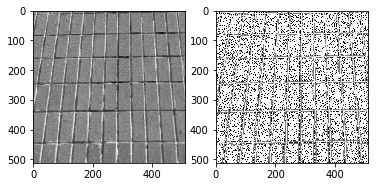

In [6]:
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.subplot(122)
plt.imshow(lbp, cmap='gray')

In [7]:
np.unique(lbp)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [8]:
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius

    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))

        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)

        # return the histogram of Local Binary Patterns
        return hist

In [9]:
desc = LocalBinaryPatterns(24, 8)

In [10]:
hist = desc.describe(gray)

In [11]:
hist

array([0.04973221, 0.04963303, 0.01266861, 0.00455856, 0.00307465,
       0.00230408, 0.00222397, 0.00194931, 0.00163269, 0.00120926,
       0.00106049, 0.00127029, 0.00170898, 0.00286102, 0.00126266,
       0.00229263, 0.00147247, 0.0033493 , 0.00211716, 0.0033493 ,
       0.00337982, 0.0066452 , 0.01699448, 0.04454041, 0.04985809,
       0.72885132])